In [3]:
%pip install -U scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'
test_dir = 'test_images'
classes = ['Bulging Eyes', 'Cataracts', 'Crossed Eyes', 'Glaucoma', 'Healthy Eyes', 'Uveitits']

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/Cataracts/image-29.jpg
Image not in ext list data/Healthy_Eyes/image-135.jpg
Image not in ext list data/Healthy_Eyes/image-120.jpg
Image not in ext list data/Healthy_Eyes/image-106.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


Image not in ext list data/Bulging_Eyes/image8.jpg
Image not in ext list data/Bulging_Eyes/image18.jpg
Image not in ext list data/Bulging_Eyes/image42.jpg


In [10]:
for image in os.listdir(test_dir):
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [11]:
tf.data.Dataset

import numpy as np
from matplotlib import pyplot as plt



In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')
#tests = tf.keras.utils.image_dataset_from_directory('test_images')

Found 733 files belonging to 6 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
# Get another batch from the iterator 
batch = data_iterator.next()

In [15]:
# images Represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
# Class 1 = Sad 
# Class 0 = happy
batch[1]

array([0, 2, 3, 2, 0, 3, 4, 0, 2, 2, 2, 2, 0, 3, 3, 3, 4, 2, 1, 1, 2, 2,
       2, 2, 4, 4, 1, 1, 2, 3, 1, 2], dtype=int32)

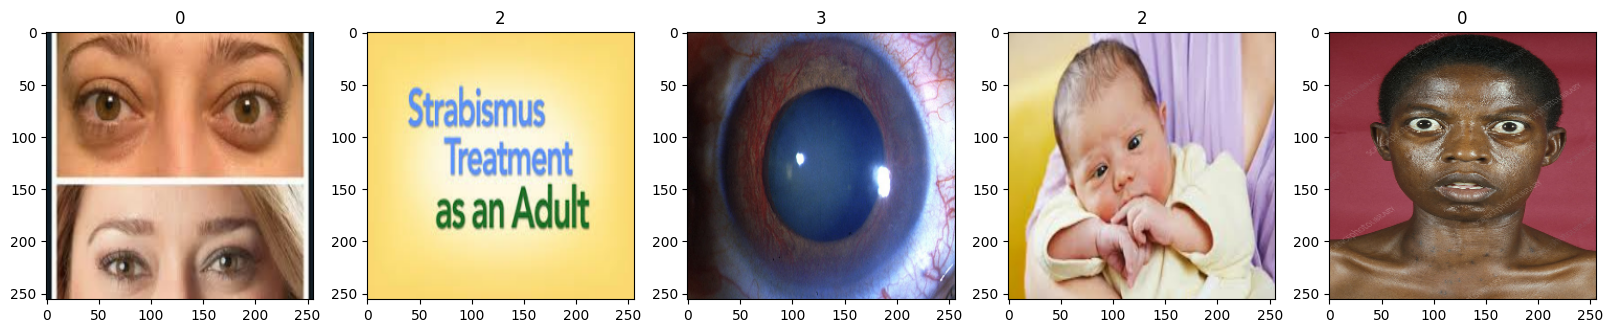

In [17]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
scaled = batch[0] / 255

In [19]:
data = data.map(lambda x, y: (x / 255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

In [22]:
batch[0].max()

1.0

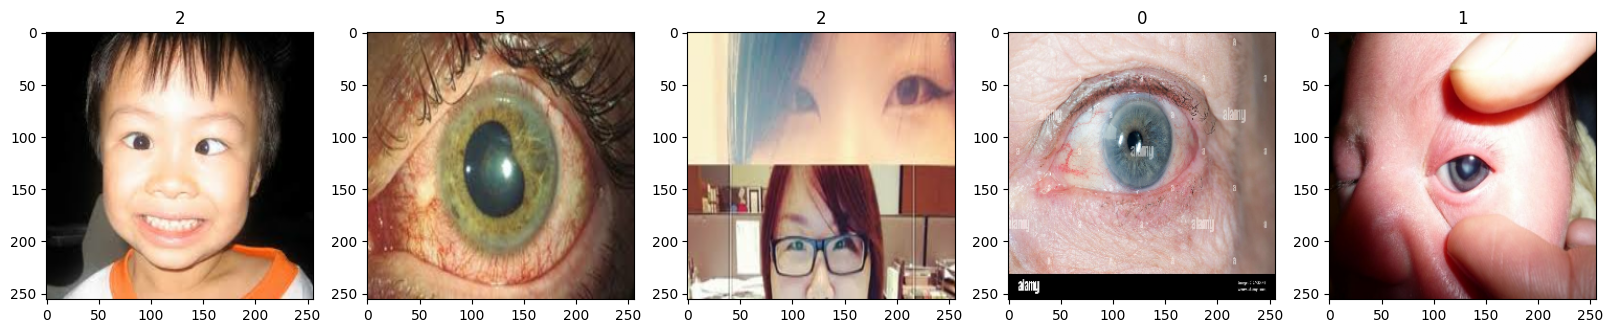

In [23]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [24]:
len(data)


23

In [25]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) + 2

train_size 

16

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

model = Sequential()


model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(64, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(Conv2D(128, (3,3), 2, padding = 'same', activation = 'relu', ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(.2))
model.add(Dense(6, activation = 'softmax'))


model.compile('adam', loss = tf.losses.sparse_categorical_crossentropy, metrics =['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs = 100, validation_data = val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)        

2022-12-02 18:43:55.340434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:43:55.340844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.7769 - accuracy: 0.2363

2022-12-02 18:44:10.411508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:44:10.411547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 32s 2s/step - loss: 1.7769 - accuracy: 0.2363 - val_loss: 1.7711 - val_accuracy: 0.2812
Epoch 2/100
 3/16 [====>.........................] - ETA: 12s - loss: 1.7209 - accuracy: 0.3333

2022-12-02 18:44:19.738591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:44:19.738643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.6321 - accuracy: 0.3555

2022-12-02 18:44:38.414424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:44:38.414466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 27s 2s/step - loss: 1.6321 - accuracy: 0.3555 - val_loss: 1.7544 - val_accuracy: 0.3125
Epoch 3/100
 3/16 [====>.........................] - ETA: 11s - loss: 1.5439 - accuracy: 0.4479

2022-12-02 18:44:46.647843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:44:46.648632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.5785 - accuracy: 0.3594

2022-12-02 18:45:01.420996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:45:01.421040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 2s/step - loss: 1.5785 - accuracy: 0.3594 - val_loss: 1.7555 - val_accuracy: 0.2734
Epoch 4/100
 4/16 [======>.......................] - ETA: 23s - loss: 1.6304 - accuracy: 0.3438

2022-12-02 18:45:18.339135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:45:18.339425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.5257 - accuracy: 0.4102

2022-12-02 18:45:41.391254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:45:41.391322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 40s 2s/step - loss: 1.5257 - accuracy: 0.4102 - val_loss: 1.7378 - val_accuracy: 0.3750
Epoch 5/100
 4/16 [======>.......................] - ETA: 30s - loss: 1.4729 - accuracy: 0.4219

2022-12-02 18:46:06.505248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:46:06.505345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.4749 - accuracy: 0.3965

2022-12-02 18:46:32.969691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:46:32.969738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 47s 3s/step - loss: 1.4749 - accuracy: 0.3965 - val_loss: 1.7057 - val_accuracy: 0.3984
Epoch 6/100
 4/16 [======>.......................] - ETA: 19s - loss: 1.3881 - accuracy: 0.4609

2022-12-02 18:46:45.630456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:46:45.630517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.3166 - accuracy: 0.4766

2022-12-02 18:46:58.088045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:46:58.088244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 25s 1s/step - loss: 1.3166 - accuracy: 0.4766 - val_loss: 1.6740 - val_accuracy: 0.4609
Epoch 7/100
 3/16 [====>.........................] - ETA: 10s - loss: 1.2702 - accuracy: 0.5208

2022-12-02 18:47:05.204184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:05.204233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.2763 - accuracy: 0.5215

2022-12-02 18:47:16.405843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:16.405885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 1.2763 - accuracy: 0.5215 - val_loss: 1.6199 - val_accuracy: 0.5078
Epoch 8/100
 3/16 [====>.........................] - ETA: 10s - loss: 1.2510 - accuracy: 0.5208

2022-12-02 18:47:22.779878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:22.779926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.1652 - accuracy: 0.5664

2022-12-02 18:47:35.269882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:35.269920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 1.1652 - accuracy: 0.5664 - val_loss: 1.5314 - val_accuracy: 0.3672
Epoch 9/100
 3/16 [====>.........................] - ETA: 14s - loss: 1.1261 - accuracy: 0.5208

2022-12-02 18:47:44.708539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:44.708587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 1.0441 - accuracy: 0.6094

2022-12-02 18:47:59.120178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:47:59.120218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 1.0441 - accuracy: 0.6094 - val_loss: 1.4756 - val_accuracy: 0.6172
Epoch 10/100
 3/16 [====>.........................] - ETA: 17s - loss: 0.8448 - accuracy: 0.6979

2022-12-02 18:48:08.921760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:48:08.921809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.6836

2022-12-02 18:48:24.351167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:48:24.351208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 27s 2s/step - loss: 0.9230 - accuracy: 0.6836 - val_loss: 1.5446 - val_accuracy: 0.4609
Epoch 11/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.6596 - accuracy: 0.7708

2022-12-02 18:48:38.768352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:48:38.768427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.9435 - accuracy: 0.6738

2022-12-02 18:48:54.965708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:48:54.965746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 28s 1s/step - loss: 0.9435 - accuracy: 0.6738 - val_loss: 1.3891 - val_accuracy: 0.5312
Epoch 12/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.6225 - accuracy: 0.8125

2022-12-02 18:49:03.858372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:49:03.859082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.9571 - accuracy: 0.6289

2022-12-02 18:49:17.988155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:49:17.988242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.9571 - accuracy: 0.6289 - val_loss: 1.4211 - val_accuracy: 0.5625
Epoch 13/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.7340 - accuracy: 0.7812

2022-12-02 18:49:26.620233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:49:26.620309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.8046 - accuracy: 0.7188

2022-12-02 18:49:39.174939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:49:39.174982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.8046 - accuracy: 0.7188 - val_loss: 1.3455 - val_accuracy: 0.6172
Epoch 14/100
 4/16 [======>.......................] - ETA: 13s - loss: 0.5117 - accuracy: 0.8359

2022-12-02 18:49:48.333836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:49:48.333880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.7773

2022-12-02 18:50:00.648854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:50:00.648902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.6323 - accuracy: 0.7773 - val_loss: 1.2328 - val_accuracy: 0.6016
Epoch 15/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.4421 - accuracy: 0.8542

2022-12-02 18:50:09.200631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:50:09.200679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.8301

2022-12-02 18:50:27.397286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:50:27.397322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 27s 2s/step - loss: 0.4721 - accuracy: 0.8301 - val_loss: 1.2276 - val_accuracy: 0.6406
Epoch 16/100
 4/16 [======>.......................] - ETA: 16s - loss: 0.4391 - accuracy: 0.8125

2022-12-02 18:50:37.822734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:50:37.822782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.8281

2022-12-02 18:50:54.996665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:50:54.996712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 31s 2s/step - loss: 0.4619 - accuracy: 0.8281 - val_loss: 1.0388 - val_accuracy: 0.7344
Epoch 17/100
 3/16 [====>.........................] - ETA: 18s - loss: 0.5098 - accuracy: 0.8021

2022-12-02 18:51:12.207266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:51:12.207407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.3937 - accuracy: 0.8574

2022-12-02 18:51:49.076999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:51:49.077057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 51s 3s/step - loss: 0.3937 - accuracy: 0.8574 - val_loss: 1.0140 - val_accuracy: 0.6641
Epoch 18/100
 4/16 [======>.......................] - ETA: 17s - loss: 0.1802 - accuracy: 0.9531

2022-12-02 18:52:01.023725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:01.024485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.9180

2022-12-02 18:52:13.889190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:13.889232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.2669 - accuracy: 0.9180 - val_loss: 0.9030 - val_accuracy: 0.7188
Epoch 19/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.2259 - accuracy: 0.8958

2022-12-02 18:52:20.638692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:20.638743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2541 - accuracy: 0.8984

2022-12-02 18:52:31.727076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:31.727106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 17s 1s/step - loss: 0.2541 - accuracy: 0.8984 - val_loss: 0.8945 - val_accuracy: 0.6484
Epoch 20/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.1432 - accuracy: 0.9792

2022-12-02 18:52:38.625317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:38.625362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2507 - accuracy: 0.9219

2022-12-02 18:52:50.975885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:50.975926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 19s 1s/step - loss: 0.2507 - accuracy: 0.9219 - val_loss: 0.7171 - val_accuracy: 0.8203
Epoch 21/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.2125 - accuracy: 0.9062

2022-12-02 18:52:57.830357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:52:57.830401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9180

2022-12-02 18:53:09.070807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:53:09.070874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.1978 - accuracy: 0.9180 - val_loss: 0.6645 - val_accuracy: 0.8047
Epoch 22/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.1258 - accuracy: 0.9583

2022-12-02 18:53:15.938235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:53:15.938697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9473

2022-12-02 18:53:30.425852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:53:30.425896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.1482 - accuracy: 0.9473 - val_loss: 0.5470 - val_accuracy: 0.8438
Epoch 23/100
 3/16 [====>.........................] - ETA: 9s - loss: 0.0790 - accuracy: 0.9792

2022-12-02 18:53:55.646819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:53:55.646859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1794 - accuracy: 0.9492

2022-12-02 18:54:05.557449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:05.557840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 15s 896ms/step - loss: 0.1794 - accuracy: 0.9492 - val_loss: 0.5233 - val_accuracy: 0.8906
Epoch 24/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.0840 - accuracy: 0.9792

2022-12-02 18:54:12.116980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:12.117024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9473

2022-12-02 18:54:21.857523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:21.857563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 16s 919ms/step - loss: 0.1602 - accuracy: 0.9473 - val_loss: 0.3820 - val_accuracy: 0.9062
Epoch 25/100
 3/16 [====>.........................] - ETA: 9s - loss: 0.0876 - accuracy: 0.9688 

2022-12-02 18:54:28.658807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:28.659587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 0.9434

2022-12-02 18:54:39.747197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:39.747235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.1704 - accuracy: 0.9434 - val_loss: 0.6487 - val_accuracy: 0.7578
Epoch 26/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.2160 - accuracy: 0.9271

2022-12-02 18:54:48.666659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:48.667334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.3228 - accuracy: 0.8965

2022-12-02 18:54:59.114432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:54:59.114470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.3228 - accuracy: 0.8965 - val_loss: 0.5816 - val_accuracy: 0.7578
Epoch 27/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.1967 - accuracy: 0.9375

2022-12-02 18:55:10.560757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:10.560809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.9004

2022-12-02 18:55:21.388635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:21.388667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.3232 - accuracy: 0.9004 - val_loss: 0.4519 - val_accuracy: 0.8359
Epoch 28/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.1136 - accuracy: 0.9583

2022-12-02 18:55:28.114026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:28.114069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9434

2022-12-02 18:55:38.351662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:38.351705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.1943 - accuracy: 0.9434 - val_loss: 0.8115 - val_accuracy: 0.6797
Epoch 29/100
 4/16 [======>.......................] - ETA: 11s - loss: 0.1826 - accuracy: 0.9219

2022-12-02 18:55:46.777794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:46.777894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9395

2022-12-02 18:55:59.260902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:55:59.261085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 20s 1s/step - loss: 0.1687 - accuracy: 0.9395 - val_loss: 0.3429 - val_accuracy: 0.8984
Epoch 30/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0540 - accuracy: 0.9896

2022-12-02 18:56:06.346240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:56:06.346288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9805

2022-12-02 18:56:20.134809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:56:20.134852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0766 - accuracy: 0.9805 - val_loss: 0.2463 - val_accuracy: 0.9297
Epoch 31/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0319 - accuracy: 1.0000

2022-12-02 18:56:27.940946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:56:27.941325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9922

2022-12-02 18:56:43.063641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:56:43.063830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0398 - accuracy: 0.9922 - val_loss: 0.1383 - val_accuracy: 0.9766
Epoch 32/100
 4/16 [======>.......................] - ETA: 11s - loss: 0.0124 - accuracy: 1.0000

2022-12-02 18:56:52.128013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:56:52.128265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9961

2022-12-02 18:57:09.959054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:57:09.959634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 28s 2s/step - loss: 0.0251 - accuracy: 0.9961 - val_loss: 0.1284 - val_accuracy: 0.9609
Epoch 33/100
 4/16 [======>.......................] - ETA: 17s - loss: 0.0086 - accuracy: 1.0000

2022-12-02 18:57:20.736451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:57:20.736597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9980

2022-12-02 18:57:34.800175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:57:34.800214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0151 - accuracy: 0.9980 - val_loss: 0.0871 - val_accuracy: 0.9844
Epoch 34/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0948 - accuracy: 0.9688

2022-12-02 18:57:43.549977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:57:43.550023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9824

2022-12-02 18:57:58.226085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:57:58.226128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0640 - accuracy: 0.9824 - val_loss: 0.2054 - val_accuracy: 0.9219
Epoch 35/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0504 - accuracy: 0.9896

2022-12-02 18:58:06.001616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:58:06.001666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9902

2022-12-02 18:58:20.046592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:58:20.046796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0330 - accuracy: 0.9902 - val_loss: 0.1653 - val_accuracy: 0.9453
Epoch 36/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0519 - accuracy: 0.9896

2022-12-02 18:58:28.091805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:58:28.091863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9824

2022-12-02 18:58:42.822863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:58:42.822904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0484 - accuracy: 0.9824 - val_loss: 0.2081 - val_accuracy: 0.8984
Epoch 37/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0352 - accuracy: 0.9896

2022-12-02 18:58:50.145747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:58:50.146404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9824

2022-12-02 18:59:03.767329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:59:03.767369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0399 - accuracy: 0.9824 - val_loss: 0.0761 - val_accuracy: 0.9766
Epoch 38/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0775 - accuracy: 0.9896

2022-12-02 18:59:11.096891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:59:11.096949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9824

2022-12-02 18:59:24.404400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:59:24.404459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0826 - accuracy: 0.9824 - val_loss: 0.1306 - val_accuracy: 0.9688
Epoch 39/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0174 - accuracy: 0.9896

2022-12-02 18:59:53.813515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 18:59:53.813591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9844

2022-12-02 19:00:06.408970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:00:06.409011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.1148 - val_accuracy: 0.9688
Epoch 40/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0415 - accuracy: 0.9792

2022-12-02 19:00:14.335805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:00:14.337564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9863

2022-12-02 19:00:28.058672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:00:28.058703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0339 - accuracy: 0.9863 - val_loss: 0.1090 - val_accuracy: 0.9766
Epoch 41/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0155 - accuracy: 0.9896

2022-12-02 19:00:37.107379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:00:37.107514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9941

2022-12-02 19:00:55.617349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:00:55.617391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 28s 2s/step - loss: 0.0138 - accuracy: 0.9941 - val_loss: 0.1451 - val_accuracy: 0.9688
Epoch 42/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0107 - accuracy: 1.0000

2022-12-02 19:01:05.414858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:01:05.415750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9922

2022-12-02 19:01:19.751677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:01:19.751717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0311 - accuracy: 0.9922 - val_loss: 0.0466 - val_accuracy: 0.9766
Epoch 43/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.0198 - accuracy: 0.9922

2022-12-02 19:01:29.203621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:01:29.203687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9766

2022-12-02 19:01:44.723210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:01:44.723255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 25s 1s/step - loss: 0.0474 - accuracy: 0.9766 - val_loss: 0.2944 - val_accuracy: 0.9219
Epoch 44/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0427 - accuracy: 0.9792

2022-12-02 19:01:53.768901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:01:53.768950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9766

2022-12-02 19:02:09.088561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:02:09.088612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0785 - accuracy: 0.9766 - val_loss: 0.1016 - val_accuracy: 0.9688
Epoch 45/100
 4/16 [======>.......................] - ETA: 9s - loss: 0.0310 - accuracy: 0.9922

2022-12-02 19:02:16.974292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:02:16.974340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9941

2022-12-02 19:02:29.768945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:02:29.768990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0304 - accuracy: 0.9941 - val_loss: 0.0393 - val_accuracy: 0.9844
Epoch 46/100
 4/16 [======>.......................] - ETA: 13s - loss: 0.0052 - accuracy: 1.0000

2022-12-02 19:02:42.545607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:02:42.545901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9961

2022-12-02 19:02:56.191161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:02:56.191199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 25s 1s/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0225 - val_accuracy: 0.9922
Epoch 47/100
 3/16 [====>.........................] - ETA: 16s - loss: 0.0037 - accuracy: 1.0000   

2022-12-02 19:03:05.588596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:03:05.588640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9902

2022-12-02 19:03:20.128726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:03:20.129403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.1068 - val_accuracy: 0.9531
Epoch 48/100
 3/16 [====>.........................] - ETA: 16s - loss: 0.0059 - accuracy: 1.0000

2022-12-02 19:03:29.472841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:03:29.472904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9629

2022-12-02 19:03:43.149264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:03:43.149305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.1586 - accuracy: 0.9629 - val_loss: 0.3519 - val_accuracy: 0.8828
Epoch 49/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.1780 - accuracy: 0.9583

2022-12-02 19:04:08.523715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:04:08.523763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2348 - accuracy: 0.9277

2022-12-02 19:04:22.643515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:04:22.643549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.2348 - accuracy: 0.9277 - val_loss: 0.1431 - val_accuracy: 0.9609
Epoch 50/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.1441 - accuracy: 0.9297

2022-12-02 19:04:32.229802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:04:32.229851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9238

2022-12-02 19:04:45.689685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:04:45.689732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.1783 - accuracy: 0.9238 - val_loss: 0.2409 - val_accuracy: 0.9453
Epoch 51/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0526 - accuracy: 0.9896

2022-12-02 19:04:53.901122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:04:53.901412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.9746

2022-12-02 19:05:07.669349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:05:07.669385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0971 - accuracy: 0.9746 - val_loss: 0.2490 - val_accuracy: 0.9219
Epoch 52/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0433 - accuracy: 0.9896

2022-12-02 19:05:35.139983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:05:35.140026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0801 - accuracy: 0.9707

2022-12-02 19:05:48.464481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:05:48.464518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0801 - accuracy: 0.9707 - val_loss: 0.2013 - val_accuracy: 0.9531
Epoch 53/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.1048 - accuracy: 0.9479

2022-12-02 19:06:15.370086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:06:15.370129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1058 - accuracy: 0.9668

2022-12-02 19:06:26.831784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:06:26.831826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 19s 1s/step - loss: 0.1058 - accuracy: 0.9668 - val_loss: 0.2979 - val_accuracy: 0.8906
Epoch 54/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.0609 - accuracy: 0.9688

2022-12-02 19:06:35.716568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:06:35.716623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1363 - accuracy: 0.9590

2022-12-02 19:06:48.197616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:06:48.197658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.1363 - accuracy: 0.9590 - val_loss: 0.2277 - val_accuracy: 0.9219
Epoch 55/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.1257 - accuracy: 0.9609

2022-12-02 19:06:57.258552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:06:57.258594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9844

2022-12-02 19:07:10.028831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:07:10.028892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.1112 - val_accuracy: 0.9766
Epoch 56/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0747 - accuracy: 0.9896

2022-12-02 19:07:38.335544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:07:38.336324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9785

2022-12-02 19:07:49.112712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:07:49.112752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 19s 1s/step - loss: 0.0552 - accuracy: 0.9785 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 57/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.0334 - accuracy: 0.9896

2022-12-02 19:07:55.481389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:07:55.481436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9883

2022-12-02 19:08:06.476688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:08:06.476729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 17s 995ms/step - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.0643 - val_accuracy: 0.9688
Epoch 58/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0137 - accuracy: 0.9896

2022-12-02 19:08:12.808171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:08:12.808827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9805

2022-12-02 19:08:31.846443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:08:31.846548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 2s/step - loss: 0.0515 - accuracy: 0.9805 - val_loss: 0.0453 - val_accuracy: 0.9844
Epoch 59/100
 4/16 [======>.......................] - ETA: 19s - loss: 0.0188 - accuracy: 0.9922  

2022-12-02 19:08:41.861046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:08:41.861746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9902

2022-12-02 19:08:59.567617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:08:59.567664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 28s 2s/step - loss: 0.0226 - accuracy: 0.9902 - val_loss: 0.1309 - val_accuracy: 0.9531
Epoch 60/100
 4/16 [======>.......................] - ETA: 17s - loss: 0.0072 - accuracy: 1.0000

2022-12-02 19:09:11.637980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:09:11.638033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9961

2022-12-02 19:09:23.787125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:09:23.787164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0206 - accuracy: 0.9961 - val_loss: 0.0233 - val_accuracy: 0.9922
Epoch 61/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.0018 - accuracy: 1.0000

2022-12-02 19:09:31.011389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:09:31.011442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9941

2022-12-02 19:09:41.885235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:09:41.885276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.0135 - accuracy: 0.9941 - val_loss: 0.1126 - val_accuracy: 0.9531
Epoch 62/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0083 - accuracy: 1.0000   

2022-12-02 19:09:48.928081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:09:48.928129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9922

2022-12-02 19:10:00.814308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:00.814354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 18s 1s/step - loss: 0.0433 - accuracy: 0.9922 - val_loss: 0.0808 - val_accuracy: 0.9922
Epoch 63/100
 4/16 [======>.......................] - ETA: 11s - loss: 0.0251 - accuracy: 0.9844

2022-12-02 19:10:08.894694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:08.894742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9922

2022-12-02 19:10:19.491136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:19.491174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 19s 1s/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0184 - val_accuracy: 0.9922
Epoch 64/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.0024 - accuracy: 1.0000   

2022-12-02 19:10:28.244467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:28.244516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9980

2022-12-02 19:10:39.094214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:39.094397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 17s 982ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 65/100
 3/16 [====>.........................] - ETA: 10s - loss: 0.0014 - accuracy: 1.0000   

2022-12-02 19:10:45.562630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:45.562681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

2022-12-02 19:10:59.366263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:10:59.366309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0793 - val_accuracy: 0.9844
Epoch 66/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0165 - accuracy: 0.9896    

2022-12-02 19:11:08.530790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:11:08.531491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9961

2022-12-02 19:11:23.119877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:11:23.119921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0096 - accuracy: 0.9961 - val_loss: 0.0718 - val_accuracy: 0.9922
Epoch 67/100
 3/16 [====>.........................] - ETA: 15s - loss: 0.0013 - accuracy: 1.0000

2022-12-02 19:11:49.214489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:11:49.215310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9980

2022-12-02 19:12:01.561186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:01.561778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0121 - accuracy: 0.9980 - val_loss: 0.0800 - val_accuracy: 0.9922
Epoch 68/100
 3/16 [====>.........................] - ETA: 11s - loss: 7.2277e-04 - accuracy: 1.0000

2022-12-02 19:12:09.171185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:09.171801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

2022-12-02 19:12:22.539045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:22.539529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 69/100
 3/16 [====>.........................] - ETA: 12s - loss: 1.5012e-04 - accuracy: 1.0000

2022-12-02 19:12:29.811526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:29.812459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9980

2022-12-02 19:12:44.226407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:44.226495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 70/100
 3/16 [====>.........................] - ETA: 13s - loss: 3.2551e-04 - accuracy: 1.0000

2022-12-02 19:12:55.108400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:12:55.108500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9980

2022-12-02 19:13:08.464437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:13:08.464472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.0148 - val_accuracy: 0.9922
Epoch 71/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.0086 - accuracy: 0.9922

2022-12-02 19:13:17.215463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:13:17.216246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9980

2022-12-02 19:13:31.395828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:13:31.395875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0034 - accuracy: 0.9980 - val_loss: 0.0784 - val_accuracy: 0.9844
Epoch 72/100
 3/16 [====>.........................] - ETA: 25s - loss: 3.5793e-04 - accuracy: 1.0000

2022-12-02 19:13:42.471872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:13:42.471919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9980    

2022-12-02 19:13:55.099062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:13:55.099107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0588 - val_accuracy: 0.9922
Epoch 73/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0014 - accuracy: 1.0000

2022-12-02 19:14:02.106617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:14:02.106664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9980

2022-12-02 19:14:23.424121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:14:23.424164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 29s 2s/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 0.1032 - val_accuracy: 0.9844
Epoch 74/100
 3/16 [====>.........................] - ETA: 15s - loss: 6.6539e-04 - accuracy: 1.0000

2022-12-02 19:14:32.636320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:14:32.636367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

2022-12-02 19:14:44.329644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:14:44.329681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 75/100
 4/16 [======>.......................] - ETA: 13s - loss: 7.3579e-04 - accuracy: 1.0000

2022-12-02 19:14:53.008463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:14:53.008515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9980    

2022-12-02 19:15:06.180420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:15:06.180470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 76/100
 3/16 [====>.........................] - ETA: 12s - loss: 1.9284e-04 - accuracy: 1.0000

2022-12-02 19:15:14.546128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:15:14.546180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000    

2022-12-02 19:15:27.749617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:15:27.750233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 21s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 77/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0127 - accuracy: 0.9896    

2022-12-02 19:15:34.784325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:15:34.784663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9961

2022-12-02 19:15:51.007017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:15:51.007066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0193 - accuracy: 0.9961 - val_loss: 0.0333 - val_accuracy: 0.9922
Epoch 78/100
 4/16 [======>.......................] - ETA: 20s - loss: 5.5143e-04 - accuracy: 1.0000

2022-12-02 19:16:01.985367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:16:01.985416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9980

2022-12-02 19:16:19.522860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:16:19.522901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 28s 2s/step - loss: 0.0083 - accuracy: 0.9980 - val_loss: 0.0904 - val_accuracy: 0.9922
Epoch 79/100
 4/16 [======>.......................] - ETA: 15s - loss: 0.0046 - accuracy: 1.0000   

2022-12-02 19:16:30.888473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:16:30.888536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

2022-12-02 19:16:48.503514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:16:48.503565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 29s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9922
Epoch 80/100
 3/16 [====>.........................] - ETA: 15s - loss: 1.6380e-04 - accuracy: 1.0000

2022-12-02 19:16:57.759927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:16:57.759974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 8.7598e-04 - accuracy: 1.0000

2022-12-02 19:17:14.378518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:17:14.378563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 2s/step - loss: 8.7598e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 81/100
 4/16 [======>.......................] - ETA: 14s - loss: 2.3313e-04 - accuracy: 1.0000

2022-12-02 19:17:25.938639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:17:25.938906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9980    

2022-12-02 19:17:38.736340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:17:38.736386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0175 - accuracy: 0.9980 - val_loss: 7.5888e-04 - val_accuracy: 1.0000
Epoch 82/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0014 - accuracy: 1.0000    

2022-12-02 19:17:48.187437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:17:48.187489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9961

2022-12-02 19:18:02.920598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:18:02.920642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0074 - accuracy: 0.9961 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 83/100
 4/16 [======>.......................] - ETA: 12s - loss: 0.0024 - accuracy: 1.0000   

2022-12-02 19:18:14.220209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:18:14.220268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.9863

2022-12-02 19:18:26.845201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:18:26.845241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0232 - accuracy: 0.9863 - val_loss: 0.0387 - val_accuracy: 0.9844
Epoch 84/100
 3/16 [====>.........................] - ETA: 11s - loss: 0.0091 - accuracy: 1.0000

2022-12-02 19:18:35.000294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:18:35.000372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9844

2022-12-02 19:18:52.544722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:18:52.544767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 2s/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.0273 - val_accuracy: 0.9844
Epoch 85/100
 4/16 [======>.......................] - ETA: 16s - loss: 0.0649 - accuracy: 0.9844

2022-12-02 19:19:03.295988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:19:03.296110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.9707

2022-12-02 19:19:18.345312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:19:18.345357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 1s/step - loss: 0.1012 - accuracy: 0.9707 - val_loss: 0.1836 - val_accuracy: 0.9297
Epoch 86/100
 3/16 [====>.........................] - ETA: 16s - loss: 0.0686 - accuracy: 0.9792

2022-12-02 19:19:28.620544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:19:28.620591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9785

2022-12-02 19:19:46.260285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:19:46.260333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 29s 2s/step - loss: 0.0579 - accuracy: 0.9785 - val_loss: 0.1299 - val_accuracy: 0.9453
Epoch 87/100
 3/16 [====>.........................] - ETA: 15s - loss: 0.1081 - accuracy: 0.9583

2022-12-02 19:20:11.019273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:20:11.019318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9707

2022-12-02 19:20:29.242626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:20:29.242665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 29s 2s/step - loss: 0.1061 - accuracy: 0.9707 - val_loss: 0.0667 - val_accuracy: 0.9766
Epoch 88/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0158 - accuracy: 1.0000

2022-12-02 19:20:37.806448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:20:37.806508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9727

2022-12-02 19:20:54.036487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:20:54.036543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 26s 1s/step - loss: 0.0686 - accuracy: 0.9727 - val_loss: 0.4091 - val_accuracy: 0.8359
Epoch 89/100
 4/16 [======>.......................] - ETA: 14s - loss: 0.1845 - accuracy: 0.9453

2022-12-02 19:21:04.822567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:21:04.822620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.9277

2022-12-02 19:21:24.617825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:21:24.617969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 32s 2s/step - loss: 0.2373 - accuracy: 0.9277 - val_loss: 0.1549 - val_accuracy: 0.9609
Epoch 90/100
 4/16 [======>.......................] - ETA: 27s - loss: 0.3825 - accuracy: 0.9219

2022-12-02 19:21:43.515915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:21:43.515971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9375

2022-12-02 19:22:07.457074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:22:07.457127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 43s 2s/step - loss: 0.2314 - accuracy: 0.9375 - val_loss: 0.4129 - val_accuracy: 0.8516
Epoch 91/100
 4/16 [======>.......................] - ETA: 13s - loss: 0.0349 - accuracy: 0.9844

2022-12-02 19:22:59.487249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:22:59.487328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9668

2022-12-02 19:23:13.186732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:23:13.186787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.1181 - accuracy: 0.9668 - val_loss: 0.2002 - val_accuracy: 0.9531
Epoch 92/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0438 - accuracy: 0.9792

2022-12-02 19:23:22.156343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:23:22.156395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.1518 - accuracy: 0.9434

2022-12-02 19:23:35.379817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:23:35.379859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.1518 - accuracy: 0.9434 - val_loss: 0.4348 - val_accuracy: 0.9062
Epoch 93/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.1190 - accuracy: 0.9583

2022-12-02 19:23:45.167876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:23:45.167924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9707

2022-12-02 19:23:58.835490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:23:58.835536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0947 - accuracy: 0.9707 - val_loss: 0.1646 - val_accuracy: 0.9297
Epoch 94/100
 4/16 [======>.......................] - ETA: 16s - loss: 0.0510 - accuracy: 0.9844

2022-12-02 19:24:09.383587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:24:09.383636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9863

2022-12-02 19:24:23.228042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:24:23.228094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 24s 1s/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9922
Epoch 95/100
 3/16 [====>.........................] - ETA: 14s - loss: 0.0229 - accuracy: 0.9896

2022-12-02 19:24:32.765367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:24:32.765458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9941

2022-12-02 19:24:46.601914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:24:46.601954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.0439 - val_accuracy: 0.9844
Epoch 96/100
 3/16 [====>.........................] - ETA: 12s - loss: 0.0019 - accuracy: 1.0000

2022-12-02 19:24:55.208861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:24:55.208910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000

2022-12-02 19:25:09.095285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:25:09.095322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9844
Epoch 97/100
 3/16 [====>.........................] - ETA: 13s - loss: 0.0041 - accuracy: 1.0000

2022-12-02 19:25:18.689036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:25:18.689089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9980

2022-12-02 19:25:32.453361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:25:32.453526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 98/100
 3/16 [====>.........................] - ETA: 16s - loss: 0.0020 - accuracy: 1.0000

2022-12-02 19:25:41.492934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:25:41.492991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 1.0000

2022-12-02 19:25:55.105620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:25:55.105672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 23s 1s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9922
Epoch 99/100
 3/16 [====>.........................] - ETA: 12s - loss: 7.4834e-04 - accuracy: 1.0000

2022-12-02 19:26:03.927955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:26:03.928019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9961

2022-12-02 19:26:17.381500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:26:17.381538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0098 - accuracy: 0.9961 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 100/100
 4/16 [======>.......................] - ETA: 13s - loss: 0.0019 - accuracy: 1.0000   

2022-12-02 19:26:26.314760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:26:26.314805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9980

2022-12-02 19:26:39.592624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-12-02 19:26:39.592665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


16/16 [==============================] - 22s 1s/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0088 - val_accuracy: 0.9922


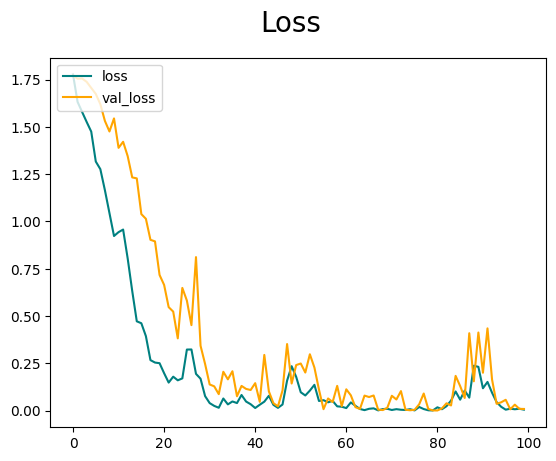

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

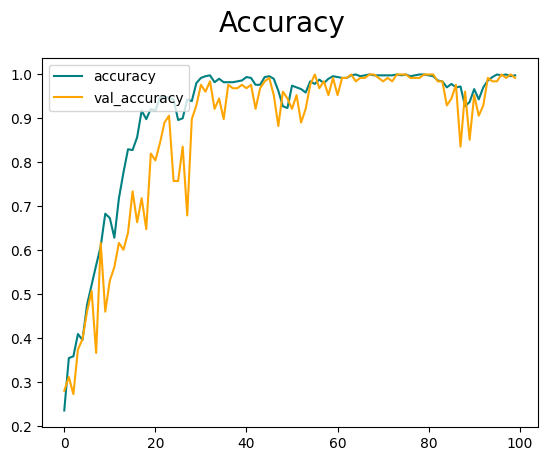

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

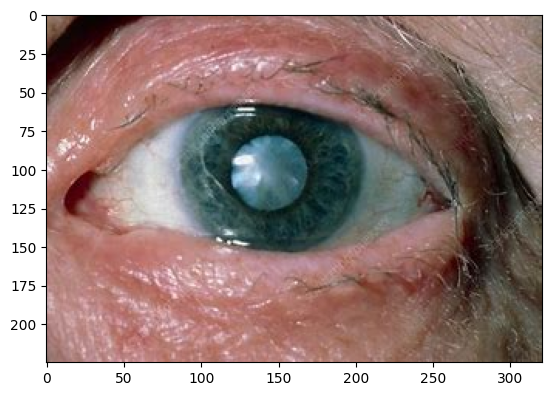

In [30]:
#You can test the NN here by passing in an image
img = cv2.imread('/Users/jbullock/EyeCU/test_images/cataracttest.jpg')
#/Users/jbullock/EyeCU/test_images/uveitistest2.jpg
#C:/Users/Ethan/OneDrive/Documents/GitHub/EyeCU/test_images/uveitistest2.jpg
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

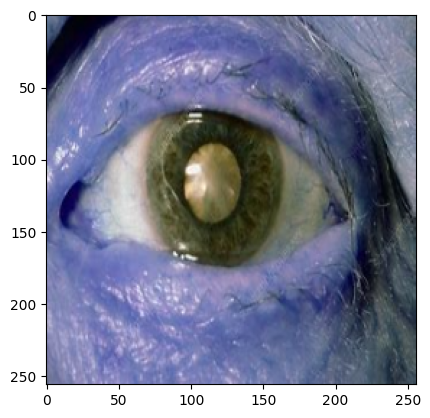

In [31]:
#Have to resize the image before we pass it into the NN
resize = tf.image.resize(img, (256, 256))
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:

preds = np.round(model.predict(batch[0]), 1)
#r = np.round(preds,5).argmax()
#r
preds
for i in range(6):
    for j in range(6):
        if preds[i][j] == 1:
            print('This image belongs to: ' + classes[j])
            
    

1/1 [==============================] - 1s 1s/step
This image belongs to: Crossed Eyes
This image belongs to: Crossed Eyes
This image belongs to: Bulging Eyes
This image belongs to: Cataracts
This image belongs to: Cataracts


In [33]:
pred = np.round(preds,6).argmax()


print(preds[0])

pred_labels = []

for i in range(6):
    r = np.round(preds[i],0).argmax()
    print(r)
    if r ==0 : pred_labels.append("Bulging Eyes")
    elif r ==1: pred_labels.append("Cataracts")
    elif r ==2: pred_labels.append("Crossed Eyes")
    elif r ==3: pred_labels.append("Glaucoma")
    elif r ==4: pred_labels.append("Healthy Eyes")
    elif r ==5: pred_labels.append("Uveitis")

[0. 0. 1. 0. 0. 0.]
2
5
2
0
1
1


(6, 256, 256, 3)


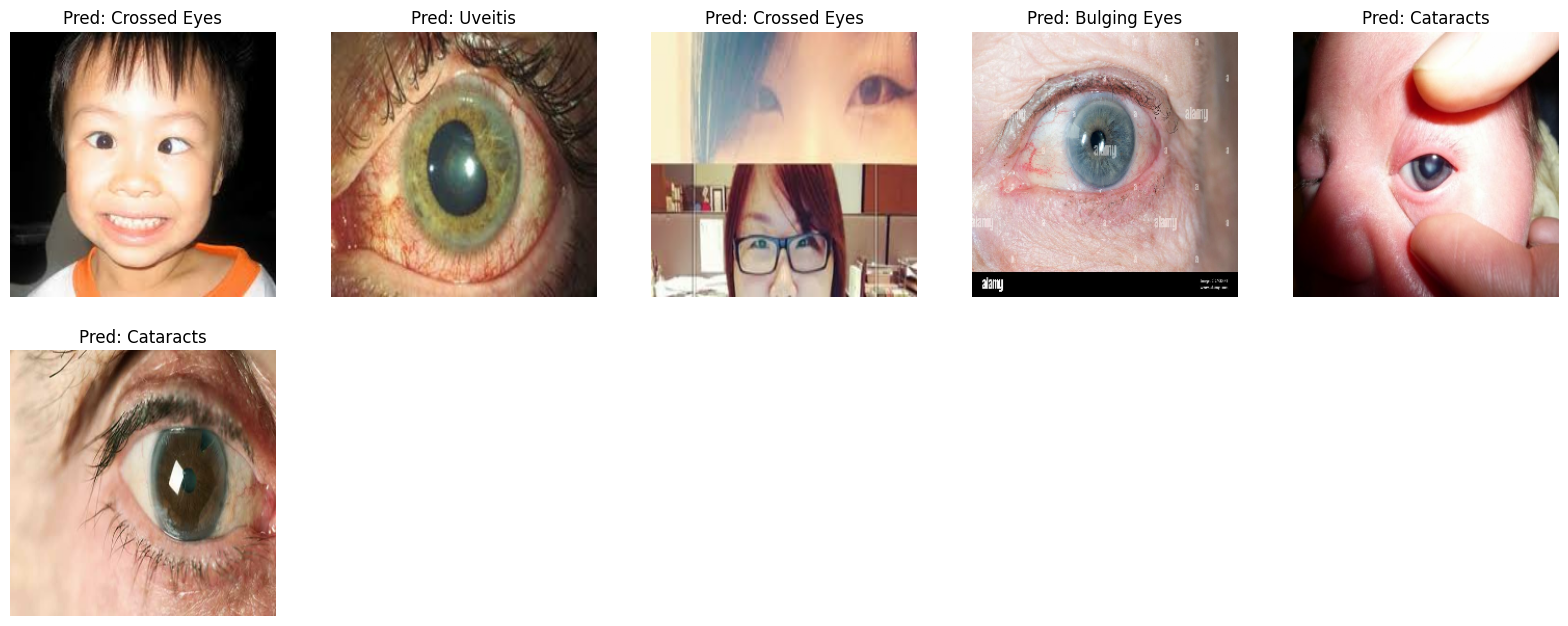

In [34]:
images = batch[0][:6]

print(images.shape)

fig = plt.figure(figsize=(20, 20))
for m in range(1, 7):
    img = images[m-1].reshape([256, 256, 3])
    fig.add_subplot(5, 5, m)
    plt.imshow(img)
    plt.title("Pred: " + pred_labels[m-1])
    plt.axis('off')
plt.show()

In [35]:

img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(resize, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[np.argmax(score)], 100 * np.max(score))
)
np.argmax(score)
score

1/1 [==============================] - 0s 219ms/step
This image most likely belongs to Glaucoma with a 35.22 percent confidence.


<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.12956253, 0.12956253, 0.12956253, 0.35218745, 0.12956253,
        0.12956253]], dtype=float32)>

In [36]:
model.save("model.hdf5")